In [128]:
def plot_graph(paths, arch_names, start_seeds, end_seeds):
    training_losses = {}

    line_colors = ["#663300", "#33cc33","#ff0000", "#660066","#66a3ff"]
    shade_colors = [ "#ffcc99","#c2f0c2","#ff9999", "#ffccff", "#b3d1ff"]

    for idx,path1 in enumerate(paths):
        random_seeds = np.arange(start_seeds[idx],end_seeds[idx])
        training_losses[arch_names[idx]] = []
        path=""
        for seed in random_seeds:
            path = path1+"/"+str(seed)
            for (dirpath, dirnames, filenames) in walk(path):
                for file in filenames:
                    if file.endswith("RNN_Train_Losses") or file.endswith("LSTM_Train_Losses"):                    
                        with open(path+"/"+file, 'rb') as handle:                        
                            losses = pickle.load(handle)
                            training_losses[arch_names[idx]].append(losses)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    min_losses = {}

    for idx, arch_name in enumerate(arch_names):
        training_losses_np = np.array(training_losses[arch_name])
        print("\n",arch_name, "\nMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*800)
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(np.arange(1,801),means,color=line_colors[idx],label=arch_name)
        plt.fill_between(np.arange(1,801),start_std_error,end_std_error, color=shade_colors[idx])

    ax.legend()
    plt.title("Copytask for T=200")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    ax.set(ylim=(0, 1))
    plt.show()


 nnRNN 
Min loss for 6 evaluation runs:  [0.00257358 0.00283257 0.00225293 0.00221689 0.00230388 0.00290732]

 expRNN 
Min loss for 6 evaluation runs:  [0.00311423 0.00470441 0.00351136 0.00327057 0.00296554 0.00455578]

 LSTM 
Min loss for 6 evaluation runs:  [0.0036639  0.0039796  0.00501818 0.00482513 0.00446925 0.00431692]

 RNN 
Min loss for 6 evaluation runs:  [0.04786243 0.01359723 0.02649403 0.01480662 0.03743237 0.00695876]


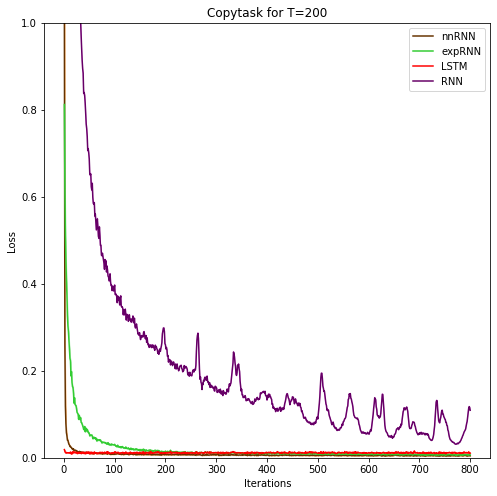

In [130]:
arch_names = ["nnRNN", "expRNN", "LSTM","RNN"]
start_seeds = [820, 820,820,820,820]
end_seeds = [826,826,826,826,826]
paths = ['./saves/saves-adding-problem/adding-problem/nnRNN', './saves/saves-adding-problem/adding-problem/expRNN',
         './saves/saves-adding-problem/adding-problem/LSTM', './saves/saves-adding-problem/adding-problem/RNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)


 nnRNN_adam 
Min loss for 6 evaluation runs:  [0.02860493 0.07218929 0.03009556 0.05747095 0.02802157 0.04462005]

 nnRNN_paper_params 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]


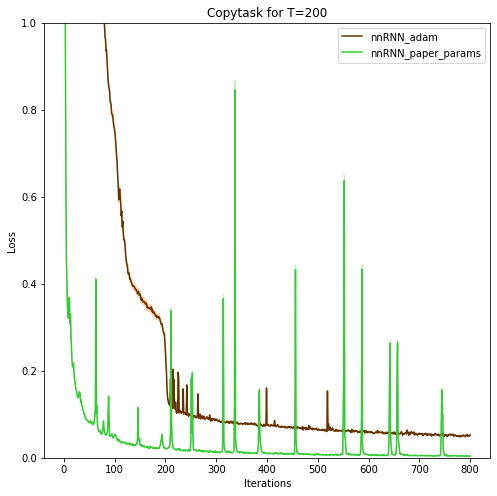

In [131]:
arch_names = ["nnRNN_adam", "nnRNN_paper_params"]
start_seeds = [920, 360]
end_seeds = [926, 366]
paths = ['./saves/saves-adam/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)


 nnRNN_paper_params 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN_random_initialization 
Min loss for 6 evaluation runs:  [0.03751167 0.03789432 0.03960103 0.03946199 0.04051093 0.04013419
 0.04260182 0.04253729 0.04310191 0.0421252  0.04026213 0.03891017]


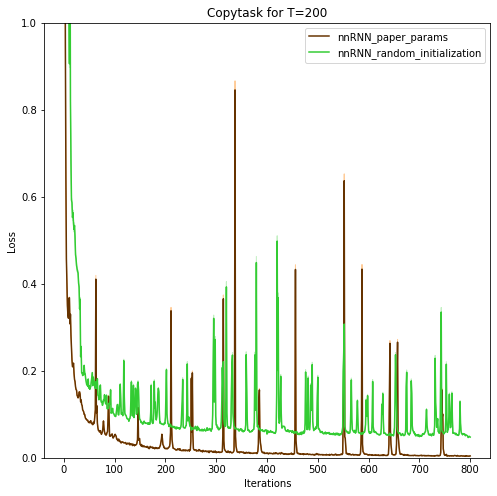

In [132]:
arch_names = ["nnRNN_paper_params","nnRNN_random_initialization"]
start_seeds = [360, 110]
end_seeds = [366,116]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN','./saves/saves-rand-init/copytask/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)


 nnRNN_l1_loss 
Min loss for 6 evaluation runs:  [0.00176957 0.00229583 0.00153883 0.00254136 0.00164771 0.00146049]

 nnRNN_paper_params 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]


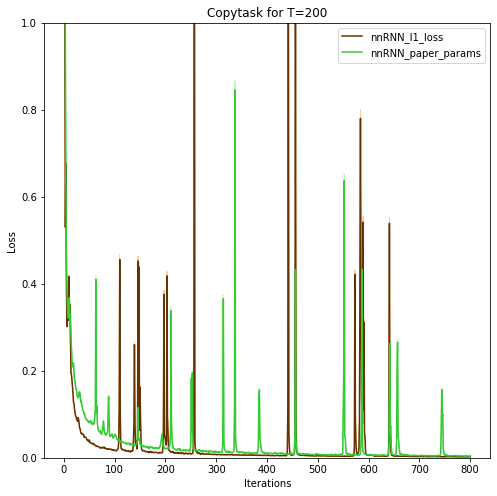

In [133]:
arch_names = ["nnRNN_l1_loss", "nnRNN_paper_params"]
start_seeds = [300, 360]
end_seeds = [306, 366]
paths = ['./saves/saves-l1-loss/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)


 nnRNN_paper_params 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN_nhid_256 
Min loss for 6 evaluation runs:  [0.00135746 0.00181456 0.00177055]


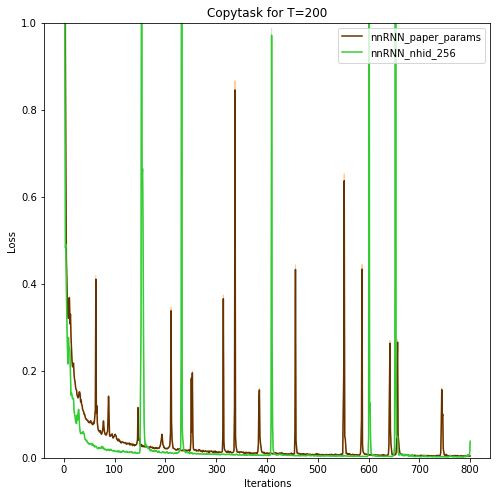

In [134]:
arch_names = ["nnRNN_paper_params", "nnRNN_nhid_256"]
start_seeds = [360,60]
end_seeds = [366, 64]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN', './saves/nhid-256-all-rnns/copytask/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)

In [135]:
# # nhid = 256
# arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
# path2 = './saves/'
# plot_graph(60,64, path2, arch_names)

In [136]:
arch_names = ["nnRNN_paper_params", "nnRNN_cayley_initialization"]
start_seeds = [360, 0]
end_seeds = [366, 6]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN',
         './saves/saves-cayley-init/copytask/nnRNN']


 nnRNN_l1_loss 
Min loss for 6 evaluation runs:  [0.00176957 0.00229583 0.00153883 0.00254136 0.00164771 0.00146049]

 nnRNN_paper_params 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN_cayley_initialization 
Min loss for 6 evaluation runs:  [0.04345827 0.040894   0.05785261 0.06673161 0.04041864 0.04155604]

 nnRNN_random_initialization 
Min loss for 6 evaluation runs:  [0.03751167 0.03789432 0.03960103 0.03946199 0.04051093 0.04013419
 0.04260182 0.04253729 0.04310191 0.0421252  0.04026213 0.03891017]

 nnRNN_nhid_256 
Min loss for 6 evaluation runs:  [0.00135746 0.00181456 0.00177055]


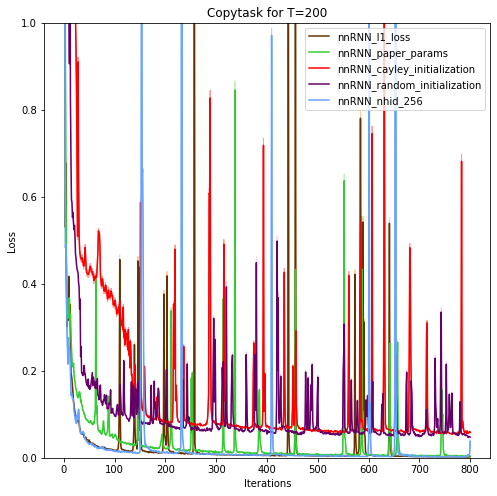

In [137]:
arch_names = ["nnRNN_l1_loss", "nnRNN_paper_params", "nnRNN_cayley_initialization", 
              "nnRNN_random_initialization", "nnRNN_nhid_256"]
start_seeds = [300, 360, 0, 110, 60]
end_seeds = [306, 366, 6, 116, 64]
paths = ['./saves/saves-l1-loss/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN',
         './saves/saves-cayley-init/copytask/nnRNN', './saves/saves-rand-init/copytask/nnRNN',
        './saves/nhid-256-all-rnns/copytask/nnRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)

RNN 	Min loss for 6 evaluation runs:  [0.10183726 0.09642754 0.13931277 0.12643945 0.10978118 0.19216652]
nnRNN 	Min loss for 6 evaluation runs:  [0.06590761 0.0358119  0.05236317 0.06791548 0.03705308 0.04107847]
expRNN 	Min loss for 6 evaluation runs:  [0.04338147 0.0453782  0.0429641  0.05178443 0.08753474 0.07701205]
LSTM 	Min loss for 6 evaluation runs:  [0.09430295 0.09474348 0.09458065 0.09418175 0.09565111 0.09475224]


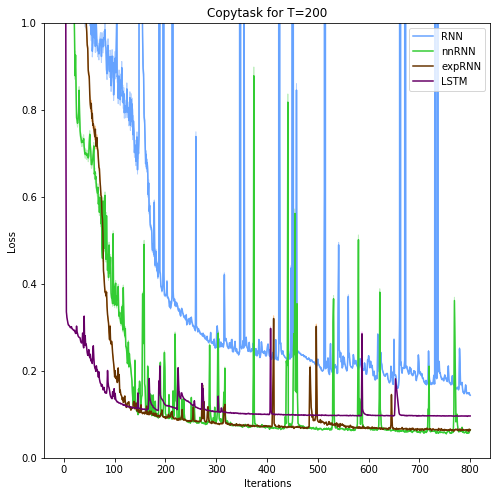

In [46]:
arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
path2 = './saves/saves-all-rnns'
plot_graph(0,6, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.10183726 0.09642754 0.13931277 0.12643945 0.10978118 0.19216652]
nnRNN 	Min loss for 6 evaluation runs:  [0.06590761 0.0358119  0.05236317 0.06791548 0.03705308 0.04107847]
expRNN 	Min loss for 6 evaluation runs:  [0.04338147 0.0453782  0.0429641  0.05178443 0.08753474 0.07701205]
LSTM 	Min loss for 6 evaluation runs:  [0.09430295 0.09474348 0.09458065 0.09418175 0.09565111 0.09475224]


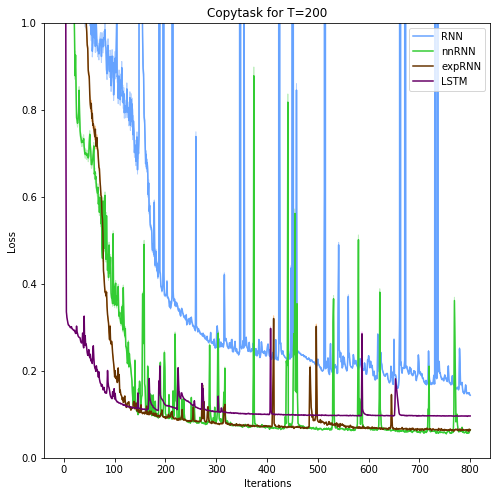

In [47]:
#New plots
arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
path2 = './saves/saves-all-rnns'
plot_graph(0,6, path2, arch_names)